In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../hdwy.csv')
df.head()

,Unnamed: 0,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,...,NaN,NaN,0,0,1,0,0.0,0,2,6.500000
1,1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,...,NaN,NaN,0,0,1,0,0.0,0,9,0.000000
2,2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,...,NaN,NaN,0,0,1,0,0.0,0,19,0.000000
3,3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,...,NaN,NaN,0,0,1,0,NaN,0,35,0.000000
4,4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,...,NaN,NaN,0,0,1,0,0.0,0,36,12.866666


In [8]:
# Grouping by OPERATOR and computing the mean and standard deviation for HDWY_DEV and ADHERENCE
operator_stats = df.groupby('OPERATOR').agg({
    'HDWY_DEV': ['mean', 'std', 'count'],
    'ADHERENCE': ['mean', 'std']
}).reset_index()

# Renaming columns for clarity
operator_stats.columns = ['OPERATOR', 'Avg_HDWY_DEV', 'Std_HDWY_DEV', 'HDWY_Count', 'Avg_ADHERENCE', 'Std_ADHERENCE']

# Sorting by Avg_HDWY_DEV for better visualization
operator_stats = operator_stats.sort_values(by='Avg_HDWY_DEV')

operator_stats.head()


,OPERATOR,Avg_HDWY_DEV,Std_HDWY_DEV,HDWY_Count,Avg_ADHERENCE,Std_ADHERENCE
28,656,-15.000000,NaN,1,-7.600000,NaN
188,2338,-4.555556,3.054343,21,-0.775308,2.084525
215,2493,-3.862963,4.392421,36,-1.050926,1.756242
253,2646,-3.360834,7.591069,20,2.395238,7.250314
257,2675,-2.629115,4.552976,877,0.252713,2.727706


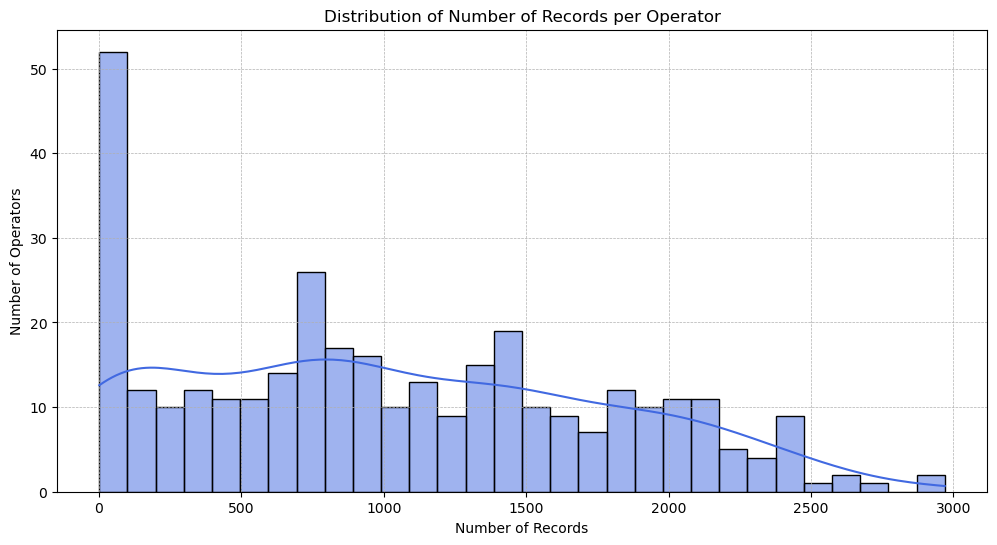

count     341.000000
mean     1027.354839
std       741.189390
min         1.000000
25%       390.000000
50%       942.000000
75%      1558.000000
max      2970.000000
Name: count, dtype: float64

In [10]:
# Distribution of the number of records per operator
operator_counts = df['OPERATOR'].value_counts()

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.histplot(operator_counts, bins=30, color='royalblue', kde=True)
plt.title('Distribution of Number of Records per Operator')
plt.xlabel('Number of Records')
plt.ylabel('Number of Operators')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Displaying summary statistics for the distribution
operator_counts.describe()


255


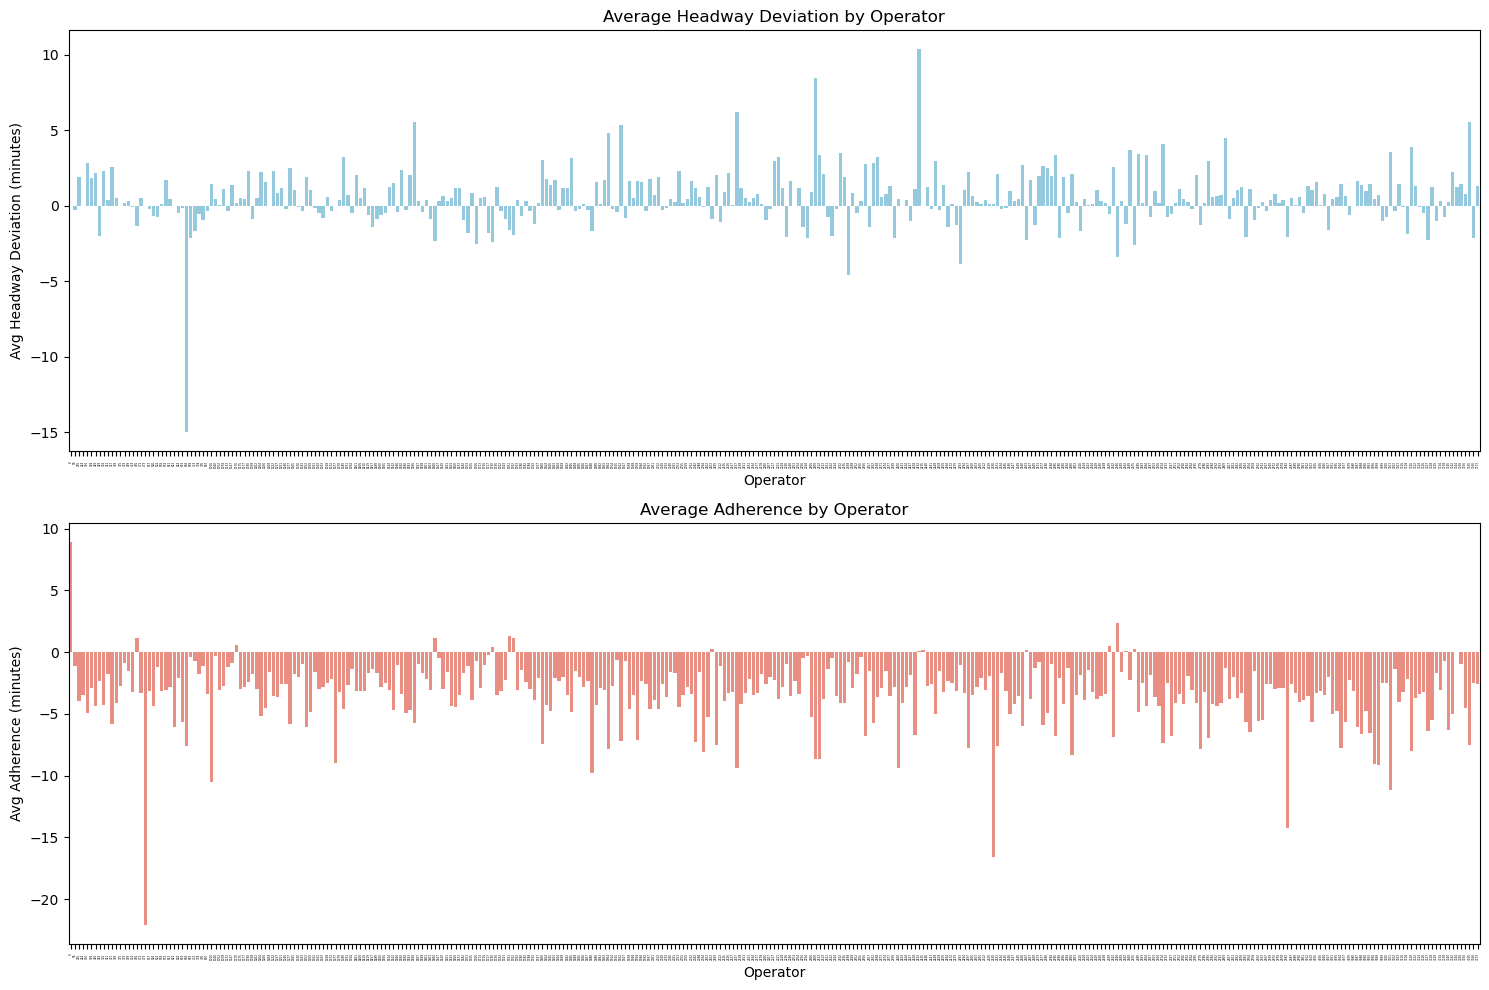

In [20]:
# Visualization of the average headway deviation and adherence for each operator
filtered_operators = operator_counts[operator_counts > 390].index
print(len(filtered_operators))
# Filter the Route 22 subset data to include only these operators
filtered_operator_data = df[df['OPERATOR'].isin(filtered_operators)]
# Setting up the canvas
plt.figure(figsize=(15, 10))

# Subplot for Average Headway Deviation
plt.subplot(2, 1, 1)
sns.barplot(data=operator_stats, x='OPERATOR', y='Avg_HDWY_DEV', color='skyblue', errorbar=None)
plt.title('Average Headway Deviation by Operator')
plt.ylabel('Avg Headway Deviation (minutes)')
plt.xlabel('Operator')
plt.xticks(rotation=90, fontsize=2)


# Subplot for Average Adherence
plt.subplot(2, 1, 2)
sns.barplot(data=operator_stats, x='OPERATOR', y='Avg_ADHERENCE', color='salmon', errorbar=None)
plt.title('Average Adherence by Operator')
plt.ylabel('Avg Adherence (minutes)')
plt.xlabel('Operator')
plt.xticks(rotation=90, fontsize=2)

# Adjust layout
plt.tight_layout()
plt.show()
